In [ ]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.feature_extraction import text

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/My Drive/patents2.json', 'r', encoding='utf-8') as jsonfile:
  patents = json.load(jsonfile)

In [ ]:
#extract titles
titles = [str(patent["biblio"]["invention_title"]) for patent in patents]

In [ ]:
#pip install scikit-learn

Cluster plot to see if there are similar technologies

In [ ]:
# Define industry keywords
technology_industry_patents = []
industry_keywords = {
    'technology': [
        'tech', 'electronics', 'software', 'hardware',
        'information technology', 'computer', 'internet',
        'telecommunication', 'artificial intelligence', 'AI',
        'machine learning', 'cybersecurity'
    ]
}

In [ ]:
#filter based on abstract and keywords
for patent in patents:
    abstract_data = patent.get('abstract', [])
    if isinstance(abstract_data, list):
        # Initialize an empty string for the abstract
        abstract = ''
        for item in abstract_data:
            if isinstance(item, str):
                abstract += item + ' '  # Concatenate string elements
    elif isinstance(abstract_data, str):
        # Use the abstract as-is if it's already a string
        abstract = abstract_data
    else:
        # Handle other cases (e.g., abstract not available)
        abstract = ''

    abstract = abstract.lower()  # Convert to lowercase for keyword matching

    if any(keyword in abstract for keyword in industry_keywords['technology']):
        technology_industry_patents.append(patent)

In [ ]:
technology_titles = [patent["biblio"]["invention_title"] for patent in technology_industry_patents]

In [ ]:
custom_stop_words = ['patent', 'invention', 'title', 'abstract']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
filtered_technology_titles = [' '.join([word for word in title.split() if word.lower() not in ENGLISH_STOP_WORDS]) for title in technology_titles]

In [ ]:
# Preprocess technology titles
processed_technology_titles = [' '.join(title.split()) for title in technology_titles]

# Concatenate titles with abstracts
technology_abstracts = [patent.get('abstract', '') for patent in technology_industry_patents]
combined_text = [f"{title} {abstract}".strip() for title, abstract in zip(processed_technology_titles, technology_abstracts)]

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(combined_text)

ValueError: ignored

In [ ]:
# K-Means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_matrix)
cluster_labels = kmeans.labels_

In [ ]:
# Add cluster labels to patents
for i, patent in enumerate(technology_industry_patents):
    patent["cluster_label"] = cluster_labels[i]

In [ ]:
# Create clusters based on cluster labels
technology_clusters = {}
for i, label in enumerate(cluster_labels):
    if label not in technology_clusters:
        technology_clusters[label] = []
    technology_clusters[label].append(technology_industry_patents[i])

In [ ]:
# Print patents in each cluster
for label, cluster in technology_clusters.items():
    print(f"Technology Cluster {label + 1}:")
    for patent in cluster:
        print(f"Title: {patent['biblio']['invention_title']}")
    print("\n")

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_matrix = tsne.fit_transform(tfidf_matrix.toarray())

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(tsne_matrix[:, 0], tsne_matrix[:, 1], c=cluster_labels, cmap='viridis')
plt.title('t-SNE Visualization of Technology Clusters')
plt.colorbar()
plt.show()

Global count

In [ ]:
jurisdiction_counts = {}

In [ ]:
# Iterate through the patents and count them by jurisdiction
for patent in patents:
    jurisdiction = patent.get("jurisdiction", "Unknown")  # Default to "Unknown" if jurisdiction is missing
    if jurisdiction in jurisdiction_counts:
        jurisdiction_counts[jurisdiction] += 1
    else:
        jurisdiction_counts[jurisdiction] = 1

In [ ]:
# Print the counts for each jurisdiction
for jurisdiction, count in jurisdiction_counts.items():
    print(f"Jurisdiction: {jurisdiction}, Count: {count}")

Jurisdiction: US, Count: 1393
Jurisdiction: WO, Count: 367
Jurisdiction: EP, Count: 435
Jurisdiction: GB, Count: 42
Jurisdiction: RS, Count: 1
Jurisdiction: ZA, Count: 64
Jurisdiction: RO, Count: 13
Jurisdiction: HU, Count: 5
Jurisdiction: NL, Count: 24
Jurisdiction: LT, Count: 5
Jurisdiction: AU, Count: 72
Jurisdiction: SK, Count: 1
Jurisdiction: CA, Count: 36
Jurisdiction: KR, Count: 591
Jurisdiction: LU, Count: 13
Jurisdiction: PL, Count: 18
Jurisdiction: IL, Count: 21
Jurisdiction: FI, Count: 5
Jurisdiction: CZ, Count: 3
Jurisdiction: MY, Count: 5
Jurisdiction: NO, Count: 2
Jurisdiction: CN, Count: 6756
Jurisdiction: SI, Count: 3
Jurisdiction: PT, Count: 2
Jurisdiction: JP, Count: 24
Jurisdiction: TW, Count: 84
Jurisdiction: GR, Count: 1
Jurisdiction: ES, Count: 3
Jurisdiction: JO, Count: 1
Jurisdiction: SA, Count: 5
Jurisdiction: CR, Count: 2
Jurisdiction: IE, Count: 2
Jurisdiction: HR, Count: 1


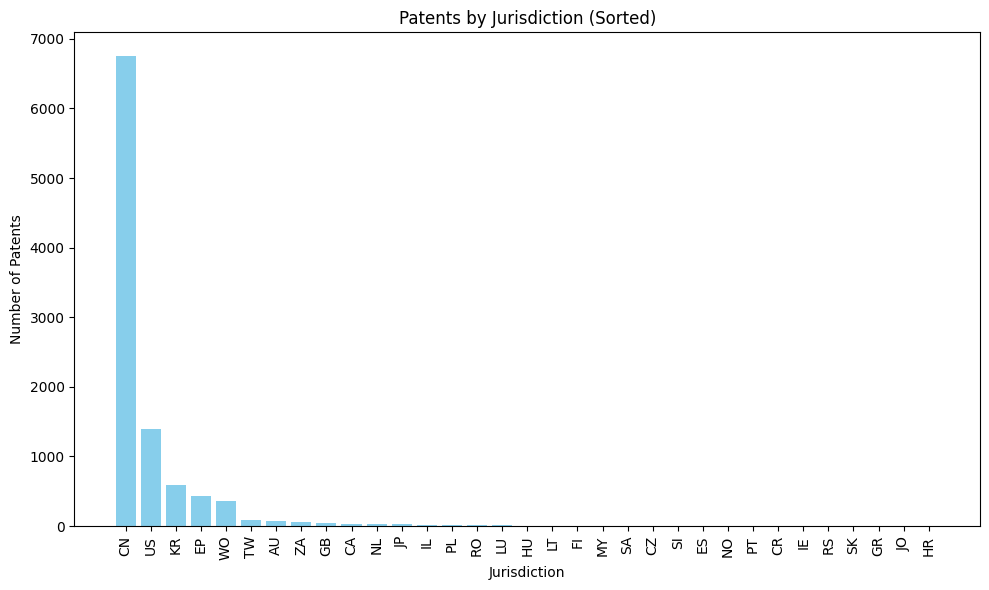

In [35]:
# Sort the dictionary by values in descending order
sorted_jurisdiction_counts = dict(sorted(jurisdiction_counts.items(), key=lambda item: item[1], reverse=True))

# Extract jurisdiction names and counts for plotting
jurisdictions = list(sorted_jurisdiction_counts.keys())
counts = list(sorted_jurisdiction_counts.values())

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(jurisdictions, counts, color='skyblue')
plt.xlabel('Jurisdiction')
plt.ylabel('Number of Patents')
plt.title('Patents by Jurisdiction (Sorted)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the bar graph
plt.tight_layout()
plt.show()


Grant Rate

In [ ]:
# Counters
total_patents = 0
granted_patents = 0

# Calculate the grant rate
for patent in patents:
    total_patents += 1
    legal_status = patent.get('legal_status', {})
    if legal_status.get('granted', False):
        granted_patents += 1

grant_rate = (granted_patents / total_patents) * 100
# Print the grant rate
print(f"Grant Rate: {grant_rate:.2f}%")

Grant Rate: 36.69%
